# Ford Go Bike Data Analysis
## by Mohit Sindhani

## Investigation Overview

> We try to explore dataset with records of Ford Go Bike Trip Data

## Dataset Overview

> There  are 183412 records in the dataset with 16 columns/features
We will focus on what time, demand is high. type and gender of customers who use the service


In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# load the dataset as a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Bike Trip Duration in seconds

> Around 15000 bike trips happened for 600-700 seconds

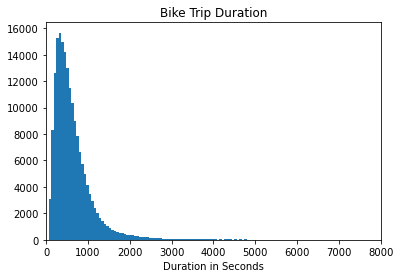

In [3]:
#Plotting of the average trip duration 
bin1 = np.arange(0, df['duration_sec'].max() + 100 , 60)
plt.hist(data = df , x = 'duration_sec' , bins = bin1)
plt.xlim(0,8000)
plt.title('Bike Trip Duration')
plt.xlabel('Duration in Seconds');

## Brike Trip subsciber vs customer

> Nearly 8 times more subscribers than customers

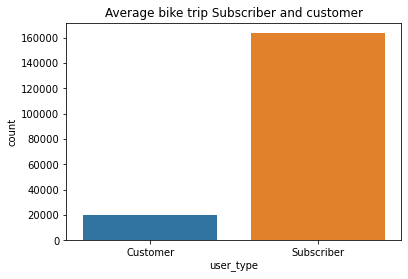

In [6]:
sns.countplot(data=df,x='user_type')
plt.title('Average bike trip Subscriber and customer');

## Average Rides by Weekdays

Clearly shows that surge was there during the week esp on Tuesday, Wednesday and Thursday

Also a clear drop is seen on Weekends - Saturday and Sunday

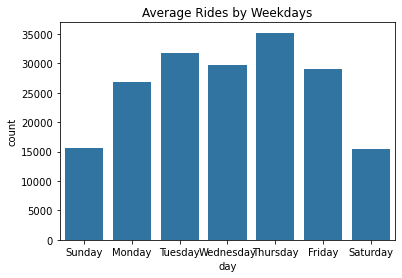

In [8]:
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
df['date'] = pd.DatetimeIndex(df['start_time']).date
df['day'] = pd.DatetimeIndex(df['date']).day_name() 
sns.countplot(data=df,x='day', color=sns.color_palette()[0],order=order)
plt.title('Average Rides by Weekdays');

## Weekly Usage by User type

This chart trends shows distinction between customers and subscribers.

Customers usually use the service throughout weekends wherever as Subscribers

principally use the service throughout regular weekdays from Mon to Friday,

Shows that subscribers use it frequently for work and

residential commute functions and customers for activities on weekends.

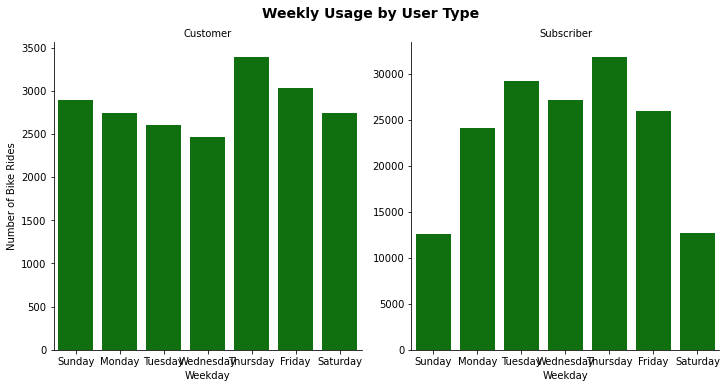

In [10]:
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
pl = sns.catplot(data=df, x='day', col="user_type", kind='count', sharey = False,
            color = 'green', order = order)
pl.set_axis_labels("Weekday", "Number of Bike Rides")
pl.set_titles("{col_name}")
pl.fig.suptitle('Weekly Usage by User Type', y=1.03, fontsize=14, fontweight='semibold');

## Bike Rides by Gender

Males in both the user types use the service more than the female gender

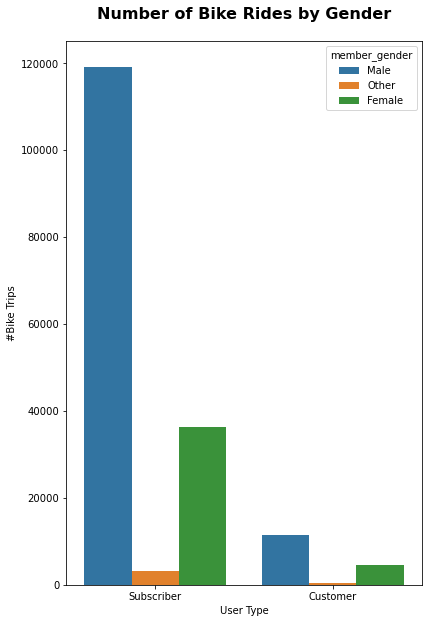

In [11]:
plt.figure(figsize = [14, 10])

# code for the bar chart
plt.subplot(1, 2, 1)

pl = sns.countplot(data=df, x="user_type", hue="member_gender", order=df['user_type'].value_counts().index)
pl.set_xlabel('User Type')
pl.set_ylabel('#Bike Trips')
pl.set_title('Number of Bike Rides by Gender', y=1.03, fontsize=16, fontweight='semibold');

## Weekly Bike Trends by user type and gender

For Customer, the trend is similar across the week for both the genders

For Subscriber, the bike usage certainly increases during the week and drops during the weekends for both Male and Female

Interestingly, Customers take less bike rides compare to subscribers who use most service throughout weekends.

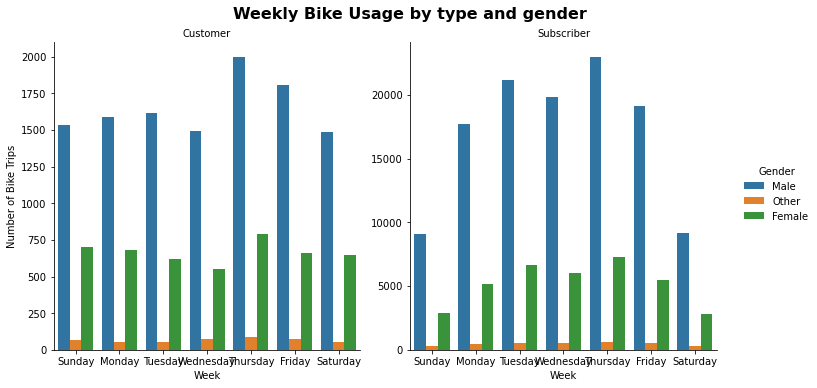

In [12]:
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
pl = sns.catplot(data=df, x='day', col="user_type", hue="member_gender", kind='count', sharey = False,order=order)
pl.set_axis_labels("Week", "Number of Bike Trips")
pl._legend.set_title('Gender')
pl.set_titles("{col_name}")
pl.fig.suptitle('Weekly Bike Usage by type and gender', y=1.03, fontsize=16, fontweight='semibold');

In [16]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')